### Outliers
#### Handling outliers in linear regression

Excercise in removing 10% of the poorest fit data points from an initial regression.

The example looks at net worth vs age and is from Udacity's intro to machine learning course:  
https://www.udacity.com/course/intro-to-machine-learning--ud120

In [31]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

ages = np.reshape( np.array(ages), (len(ages), 1))
net_worths = np.reshape( np.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(ages_train,net_worths_train)
print 'Slope Original data set :',reg.coef_[0][0]
print 'Variance / Score  :',reg.score(ages_test,net_worths_test)



Slope Original data set : 5.07793064344
Variance / Score  : 0.878262478835


In [29]:
# Function to remove 10% of data points with poorest fit
def outlierCleaner(predictions, ages, net_worths):
    temp_data = np.column_stack((predictions,ages,net_worths,np.abs(predictions-net_worths)))
    print 'Original data contains',len(temp_data),'samples'
    print 'Keeping 90% of the samples with best fit'
    #sort temp data by largest error
    temp_data_sorted = temp_data[temp_data[:, 3].argsort()]
    # keep 90% of the data with lowest error
    temp_data = temp_data_sorted[0:int(len(temp_data)*0.9)]
    cleaned_data = np.column_stack((temp_data[:,1],temp_data[:,2],temp_data[:,2]-temp_data[:,3]))
    print 'Clean data contains',len(cleaned_data),'samples'

    return cleaned_data


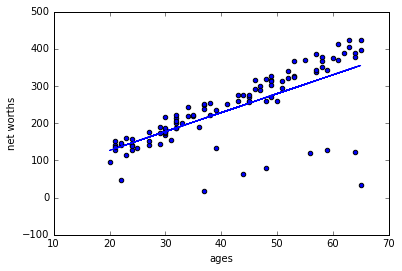

Original data contains 90 samples
Keeping 90% of the samples with best fit
Clean data contains 81 samples
Clean Slope : 6.36859480694
Clean Score : 0.983189455396


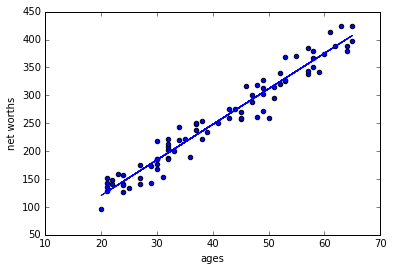

In [32]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.xlabel("ages")
plt.ylabel("net worths")
plt.scatter(ages, net_worths)
plt.show()


### Identify and remove 10% of data points with the poorest fit to the initial regression
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages = np.reshape( np.array(ages), (len(ages), 1))
    net_worths = np.reshape( np.array(net_worths), (len(net_worths), 1))

    ### Refit the cleaned data
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        print 'Clean Slope :',reg.coef_[0][0]
        print 'Clean Score :',reg.score(ages_test,net_worths_test)
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

